In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading Dataset
data=pd.read_csv("/content/drive/MyDrive/Wine 0.csv")
data

Alcohol  Malic acid   Ash  ...   Hue  OD280/OD315 of diluted wines  Proline
0      14.23        1.71  2.43  ...  1.04                          3.92     1065
1      13.20        1.78  2.14  ...  1.05                          3.40     1050
2      13.16        2.36  2.67  ...  1.03                          3.17     1185
3      14.37        1.95  2.50  ...  0.86                          3.45     1480
4      13.24        2.59  2.87  ...  1.04                          2.93      735
..       ...         ...   ...  ...   ...                           ...      ...
173    13.71        5.65  2.45  ...  0.64                          1.74      740
174    13.40        3.91  2.48  ...  0.70                          1.56      750
175    13.27        4.28  2.26  ...  0.59                          1.56      835
176    13.17        2.59  2.37  ...  0.60                          1.62      840
177    14.13        4.10  2.74  ...  0.61                          1.60      560

[178 rows x 13 columns]

In [ ]:
# Check all the variables in the dataset
data.columns
# Datatypes of the variables
data.dtypes
#Summary of the dataset
data.describe()

Alcohol  Malic acid  ...  OD280/OD315 of diluted wines      Proline
count  178.000000  178.000000  ...                    178.000000   178.000000
mean    13.000618    2.336348  ...                      2.611685   746.893258
std      0.811827    1.117146  ...                      0.709990   314.907474
min     11.030000    0.740000  ...                      1.270000   278.000000
25%     12.362500    1.602500  ...                      1.937500   500.500000
50%     13.050000    1.865000  ...                      2.780000   673.500000
75%     13.677500    3.082500  ...                      3.170000   985.000000
max     14.830000    5.800000  ...                      4.000000  1680.000000

[8 rows x 13 columns]

In [ ]:
# A user-defined function for univariate analysis

def univarstats(data):
  univar_df=pd.DataFrame(columns=['Count','Missing','No. of Unique','Dtype','Numeric','Mode','Mean','Min','25%','Median','75%','Max',
                                  'Std','Skewness','Kurtosis','Coeff of Variation'])

  for col in data:
      univar_df.loc[col]=[data[col].count(),data[col].isnull().sum(),data[col].nunique(),data[col].dtype,pd.api.types.is_numeric_dtype(data[col]),
                          data[col].mode().values[0],data[col].mean(),data[col].min(),data[col].quantile(0.25),data[col].median(),data[col].quantile(0.75),
                          data[col].max(),data[col].std(),data[col].skew(),data[col].kurt(),(data[col].std())/(data[col].mean())]
    
  return univar_df.sort_values(by=['Coeff of Variation','Skewness','No. of Unique'],ascending=False)

  pd.set_option('display.max_rows',100)
  pd.set_option('display.max_columns',100)


In [ ]:
univarstats(data)

Count Missing  ...  Kurtosis Coeff of Variation
Flavanoids                     178       0  ... -0.880382           0.492226
Malic acid                     178       0  ...  0.299207           0.478159
Color intensity                178       0  ...  0.381522           0.458332
Proline                        178       0  ... -0.248403           0.421623
Proanthocyanins                178       0  ...  0.554649           0.359771
Nonflavanoid phenols           178       0  ... -0.637191           0.343933
Total phenols                  178       0  ... -0.835627           0.272689
OD280/OD315 of diluted wines   178       0  ... -1.086435           0.271851
Hue                            178       0  ... -0.344096           0.238730
Alcalinity of ash              178       0  ...  0.487942           0.171304
Magnesium                      178       0  ...  2.104991           0.143195
Ash                            178       0  ...  1.143978           0.115927
Alcohol                        178       0  ... -0.852500           0.062445

[13 rows x 16 columns]

Conclusion:

From the above statistics , we can say that :

* There are no missing values in the dataset.
* All the variables are of numeric data in type most of the value are float data type and one is integer type.
* Magnesium is highly positively-skewed where OD280/OD315 of diluted wines is highly negatively skewed.
* All the variables are on different scale, so we need to standardize them to get better result.
* Coefficient of Variation is maximum for Flavanoids,so variability in the data is explained the most by Flavanoids.



## *Some Uni-variate Graphical Analysis*

### **1.BOX PLOT**: 
Box plot is a statistical chart oftenly used in EDA. It visually show the distribution of numerical data and skewness through displaying the data in quartiles and averages.




# Diagram:


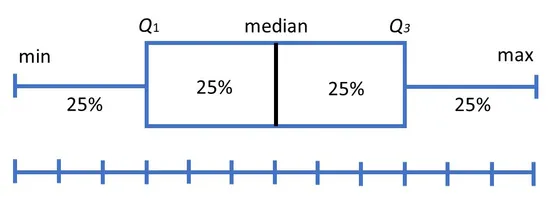

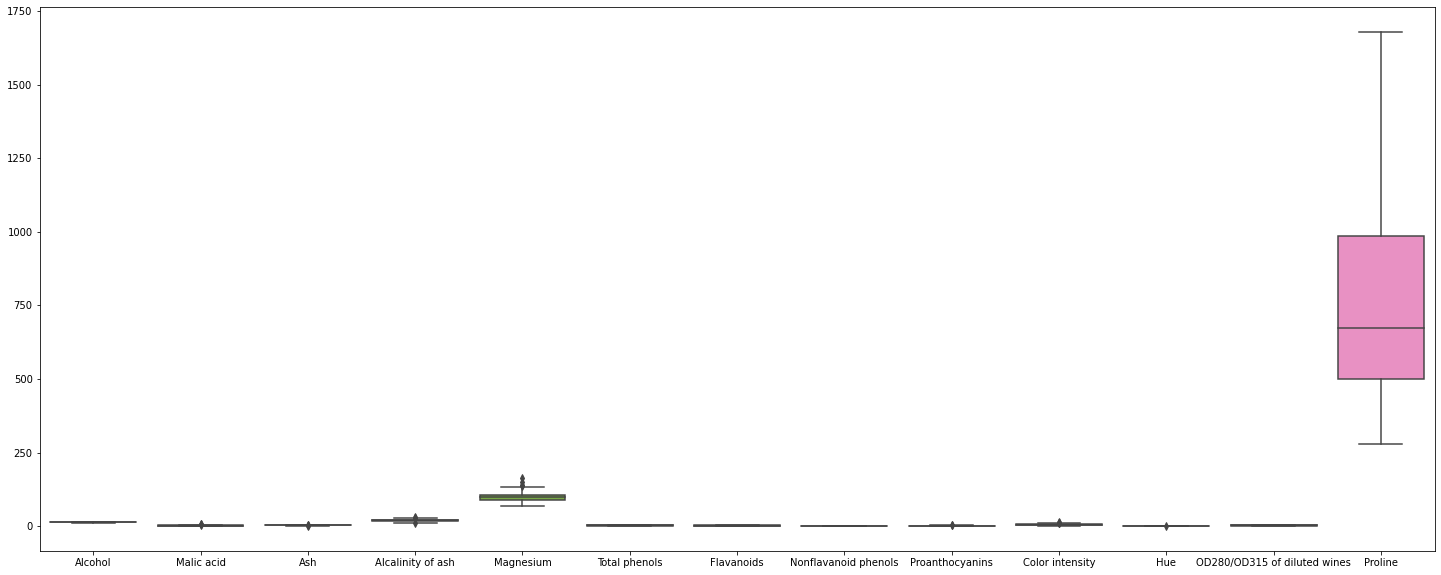

In [ ]:
# Box Plot
plt.figure(figsize=(25,10))
sns.boxplot(data=data)

Observation:

The above boxplots shows that, Proline has much higher scale than other variables and there are very few outliers in the dataset.

# **2.Histogram Density Plot**:

The histogram is the graphical representation that organizes a group of data points into the specified range. Histogram provides the Visual representation of data distribution. By using a histogram we can represent a large amount of data, and its frequency.

Density Plot is the continuous and smoothed version of the Histogram estimated from the data. It is estimated through Kernel Density Estimation.

# Diagram:


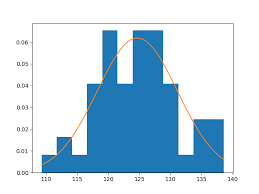

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

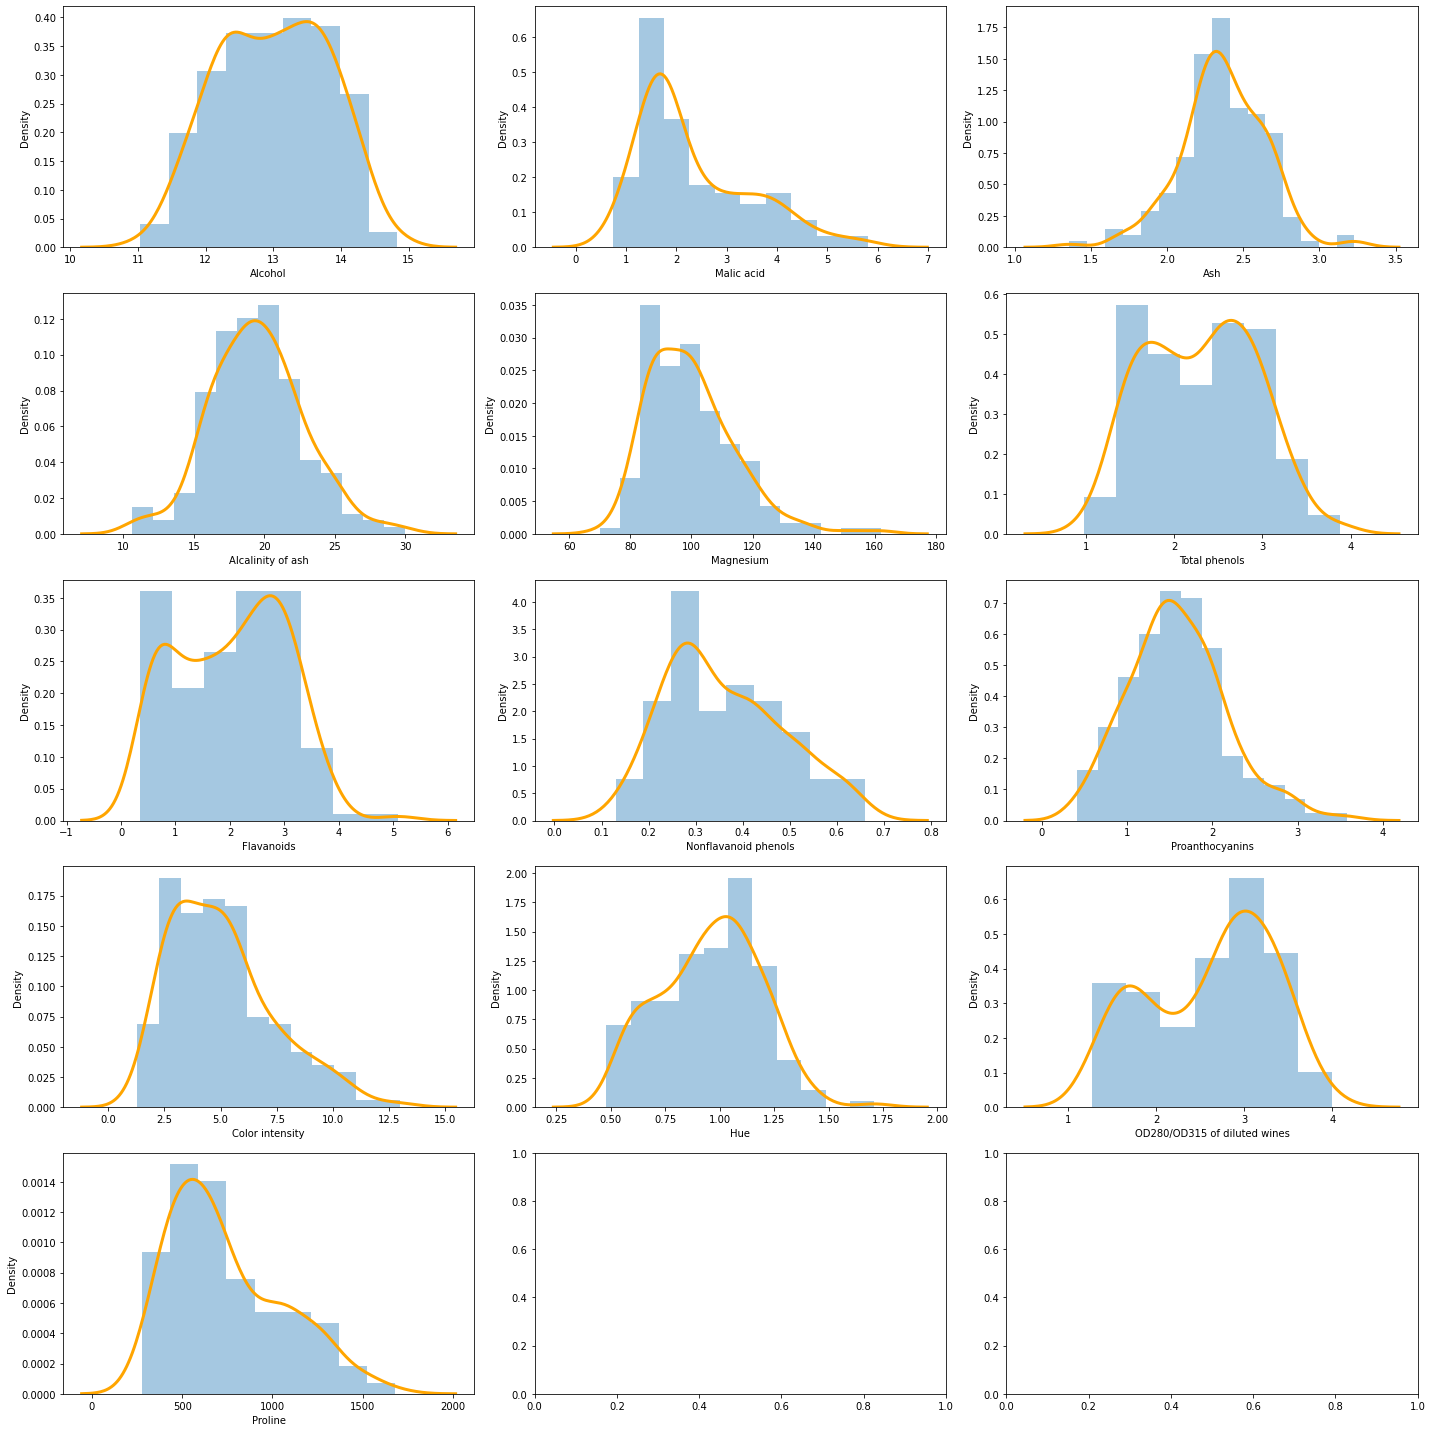

In [ ]:
# Histogram Density Plot 

rows=5
cols=3
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20));
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],ax=ax[i][j],kde_kws={'linewidth':3,'color':'orange'});
        index+=1
        if index>12:
            break
plt.tight_layout();
plt.show();

Observation:

Alcohol,Malic acid,Hue,Proline,Total Phenols,Flavanoids and OD280/OD315 of diluted wines suggests the presence of 2 clusters in dataset.
Alcalinity of ash and Magenisum follows the Normal Distribution Curve.

## **Some Multi-variate Analysis:**

# **1.Correlation Coefficient:**
Correlation Coefficients are used to measure how strong a relationship is between two variables.It measures the linear relationship of two variables.

In [ ]:
data.corr()

Alcohol  ...   Proline
Alcohol                       1.000000  ...  0.643720
Malic acid                    0.094397  ... -0.192011
Ash                           0.211545  ...  0.223626
Alcalinity of ash            -0.310235  ... -0.440597
Magnesium                     0.270798  ...  0.393351
Total phenols                 0.289101  ...  0.498115
Flavanoids                    0.236815  ...  0.494193
Nonflavanoid phenols         -0.155929  ... -0.311385
Proanthocyanins               0.136698  ...  0.330417
Color intensity               0.546364  ...  0.316100
Hue                          -0.071747  ...  0.236183
OD280/OD315 of diluted wines  0.072343  ...  0.312761
Proline                       0.643720  ...  1.000000

[13 rows x 13 columns]

Observaton:

Positive Correlation:

1.Flavanoids & Total Phenols

2.Flavanoids & OD280/OD315 of diluted wines

3.Alcohol & Proline

4.Total Phenols & Proanthocyanins

5.Total Phenols & OD280/OD31 diluted wines

6.Flavanoids & Proanthocyanins

Negative Correlation:

1.Malic acid & Hue

2.Flavanoids & nonflavanoid phenols

3.Color intensity & Hue

### **Correlation Heat Map:**
A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column.

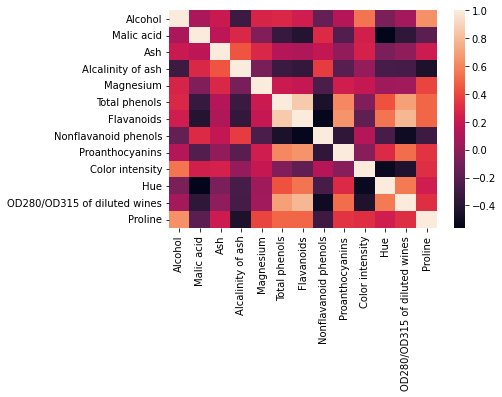

In [ ]:
# plotting correlation heatmap
dataplot=sns.heatmap(data.corr())

# displaying heatmap
plt.show()

## **Obsevation:**

Correlation heatmap is graphical representation of correlation matrix representing correlation between different variables.

The value of correlation can take any values from -1 to 1.


### **It's time to visualize the correlation of each variable with all variables in the dataset:**

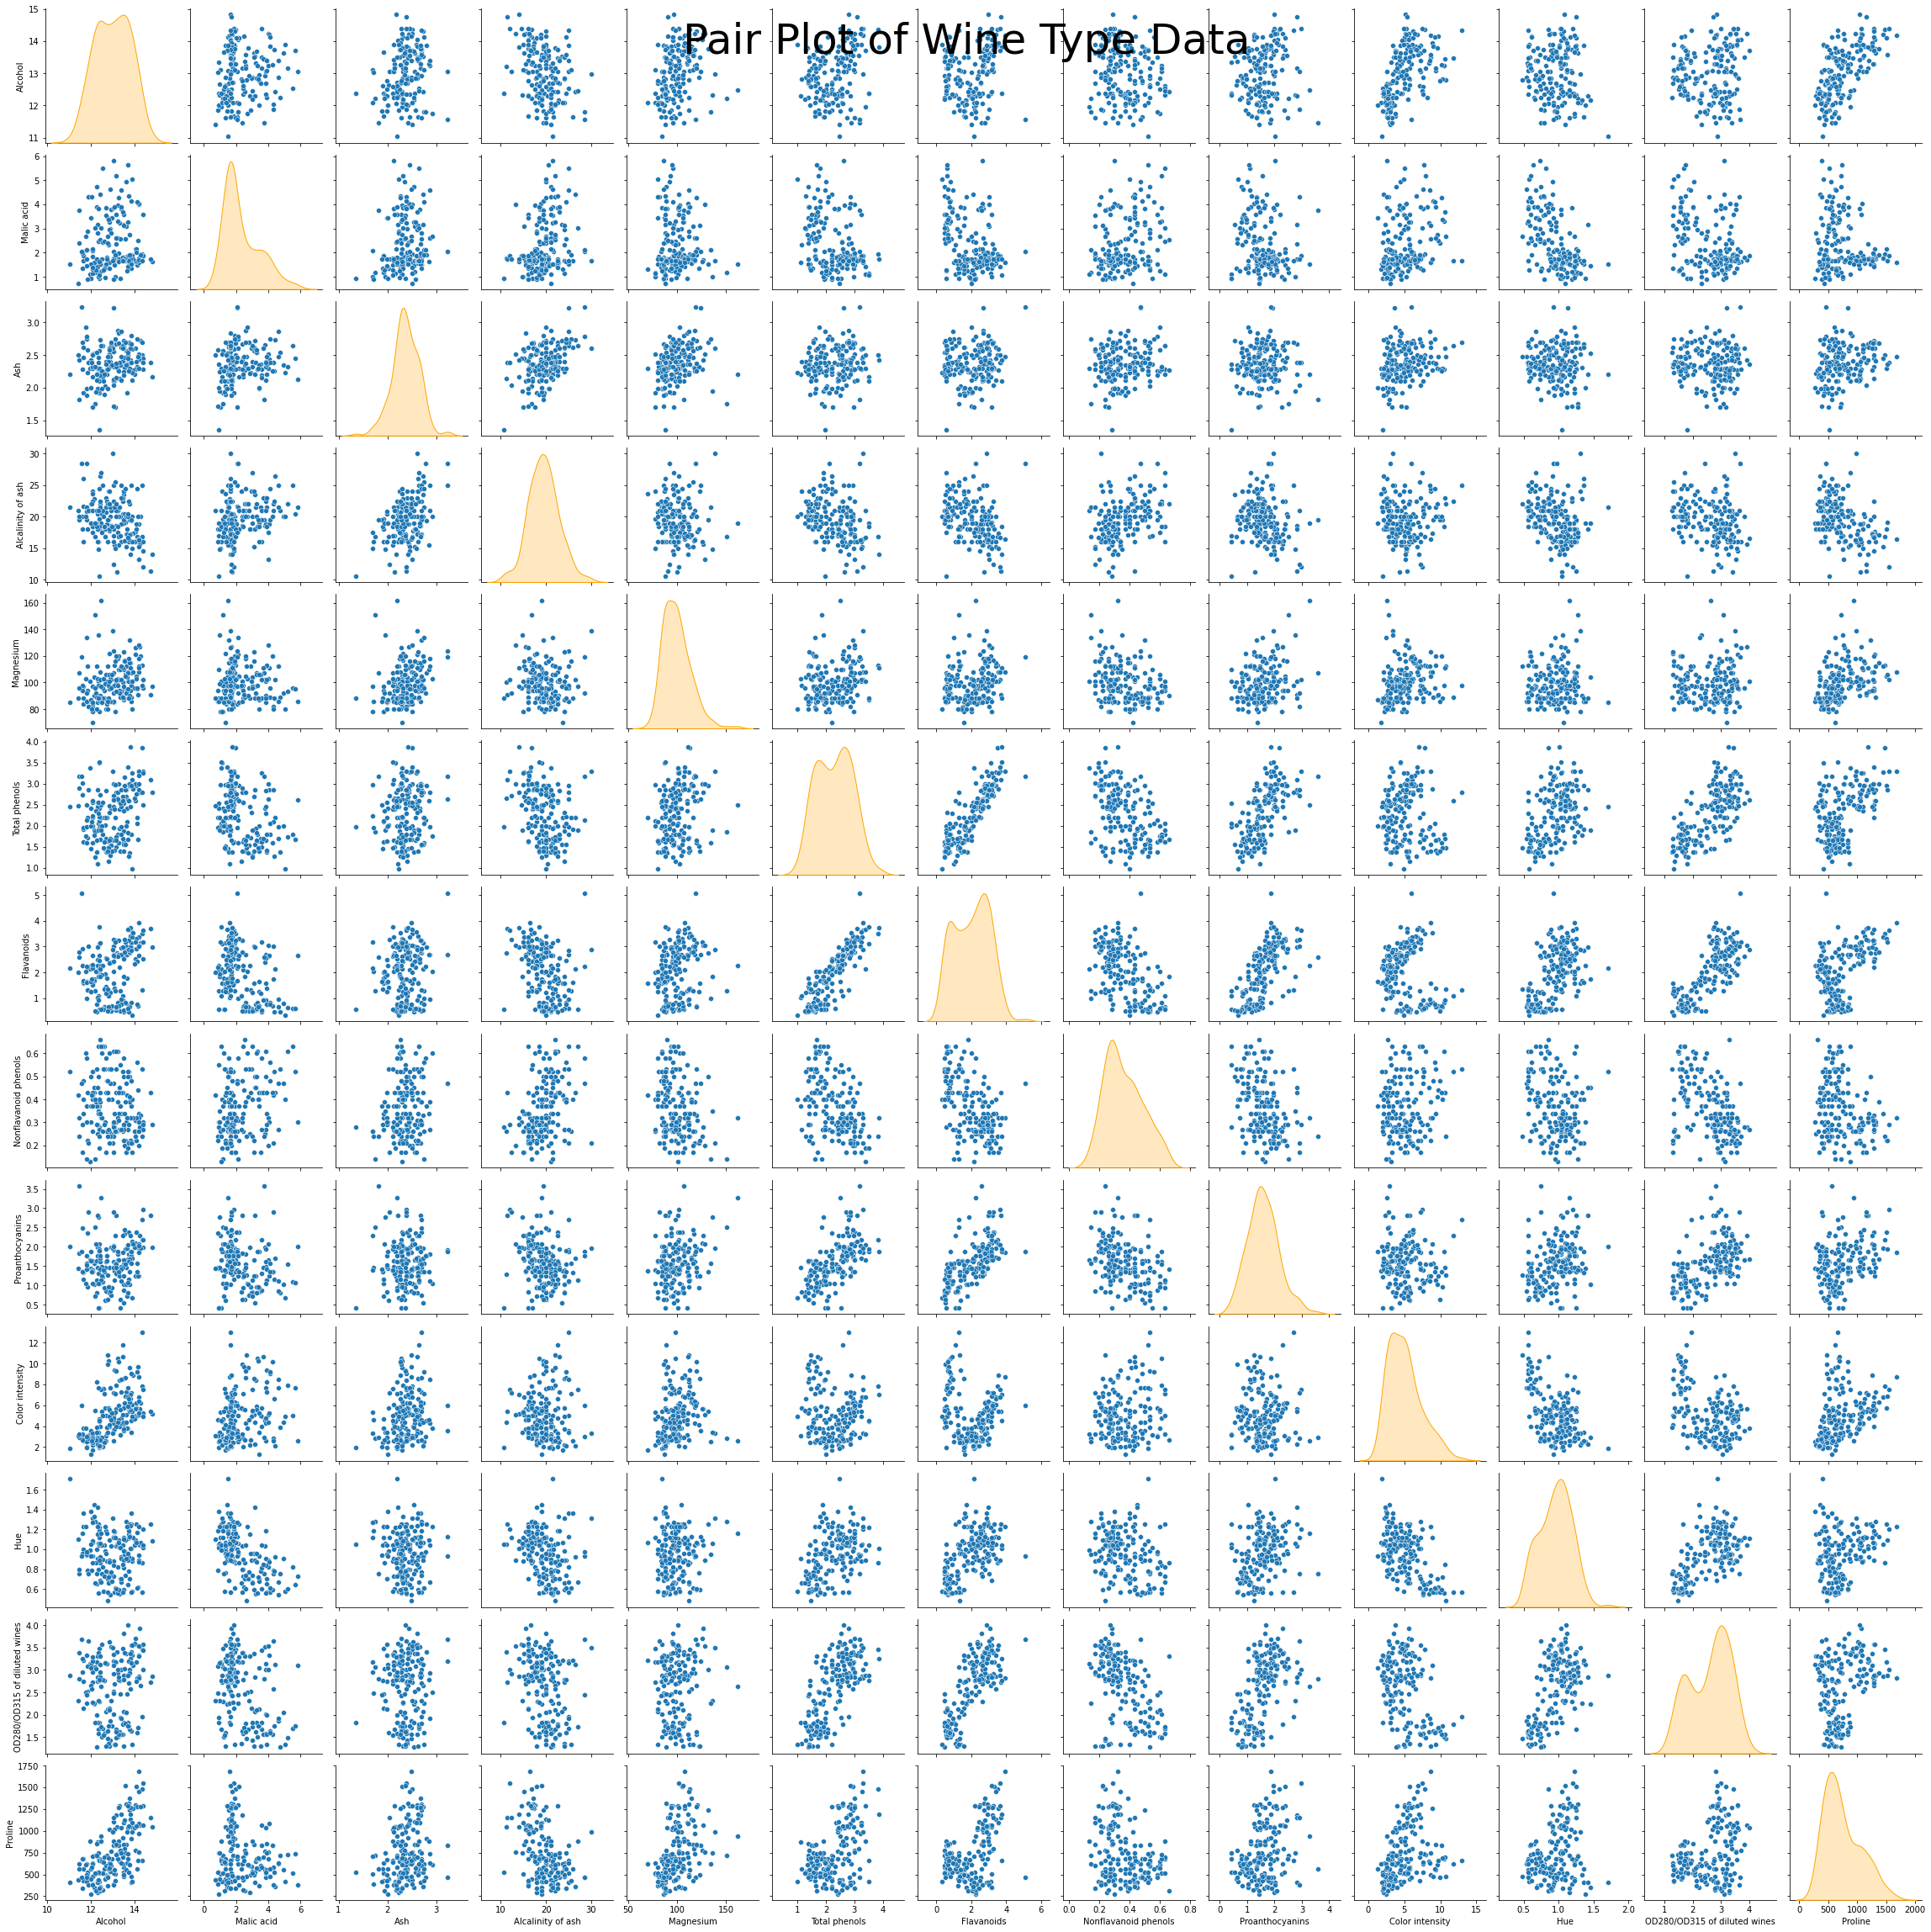

In [ ]:
#We use Seaborn library to get the Pair-plot with KDE Plot at the diagonals 
sns.pairplot(data,diag_kind='kde', diag_kws={'color':'orange'})
plt.suptitle('Pair Plot of Wine Type Data', size = 50);

Text(0.5, 0.98, 'Pairgrid(kde plots) in lower map')

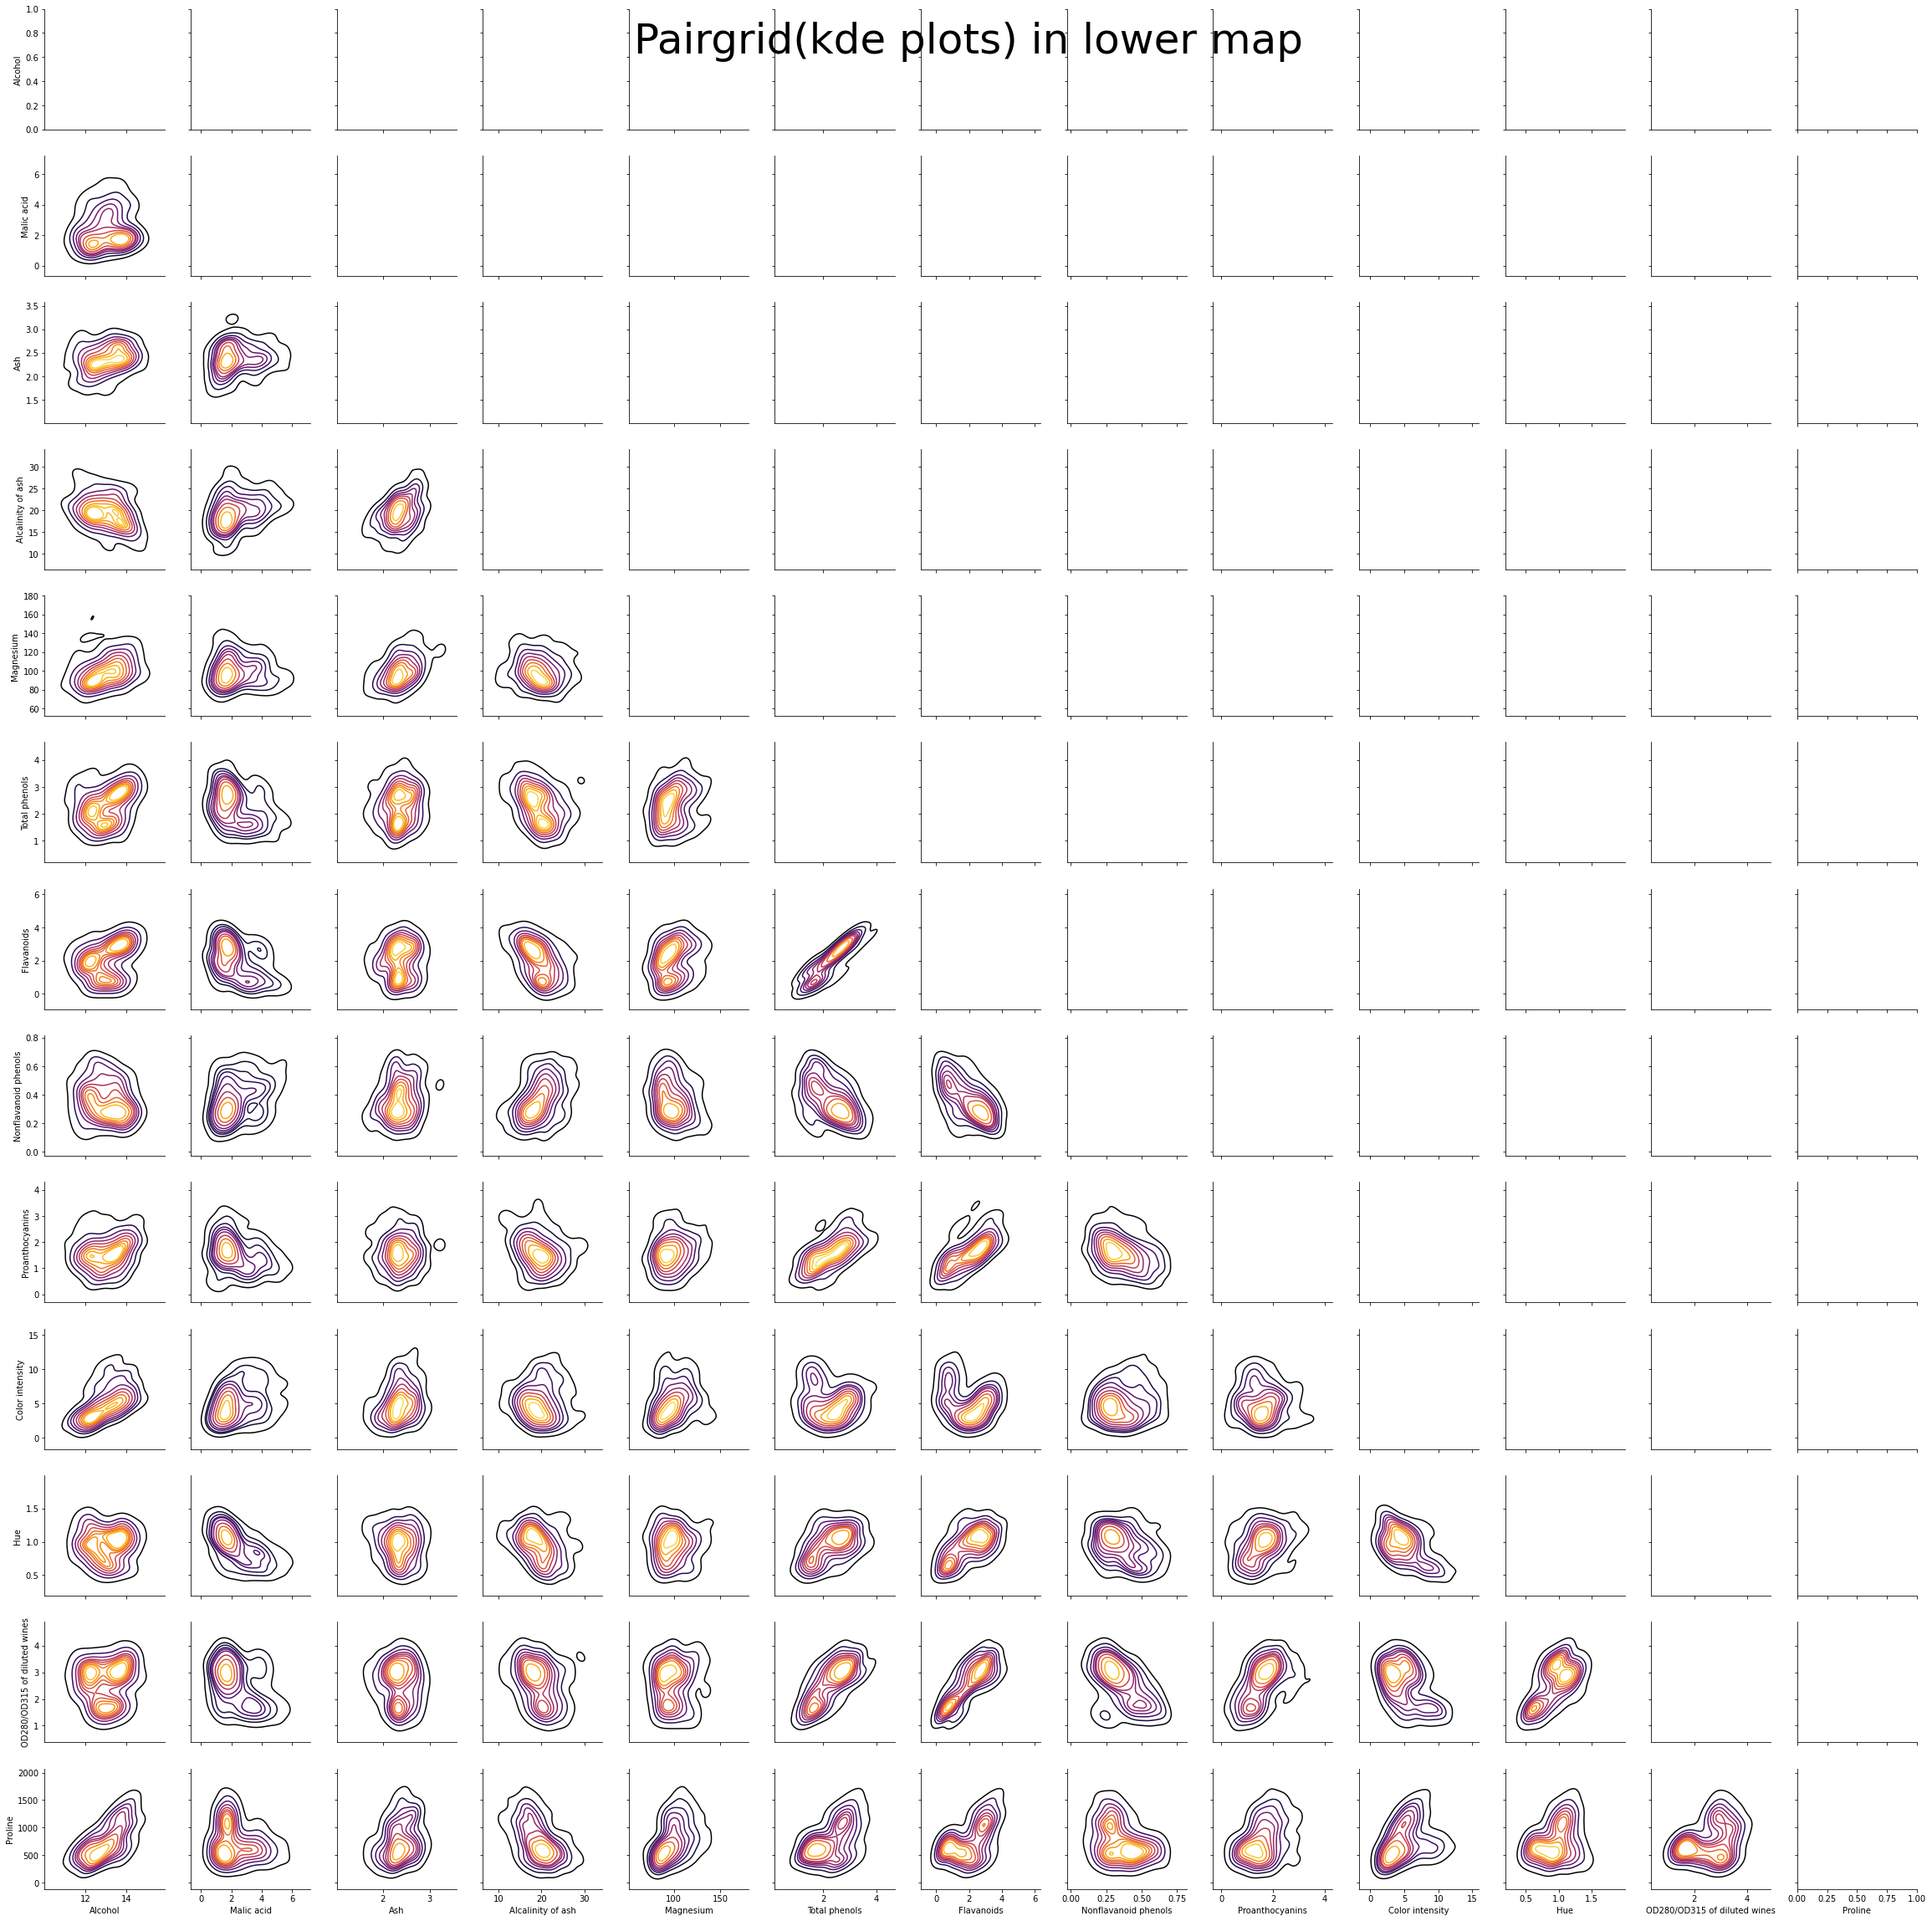

In [ ]:
#Pair grid with kde plots
grid=sns.PairGrid(data)
grid.map_lower(sns.kdeplot,cmap = 'inferno');
plt.suptitle('Pairgrid(kde plots) in lower map',size=50)

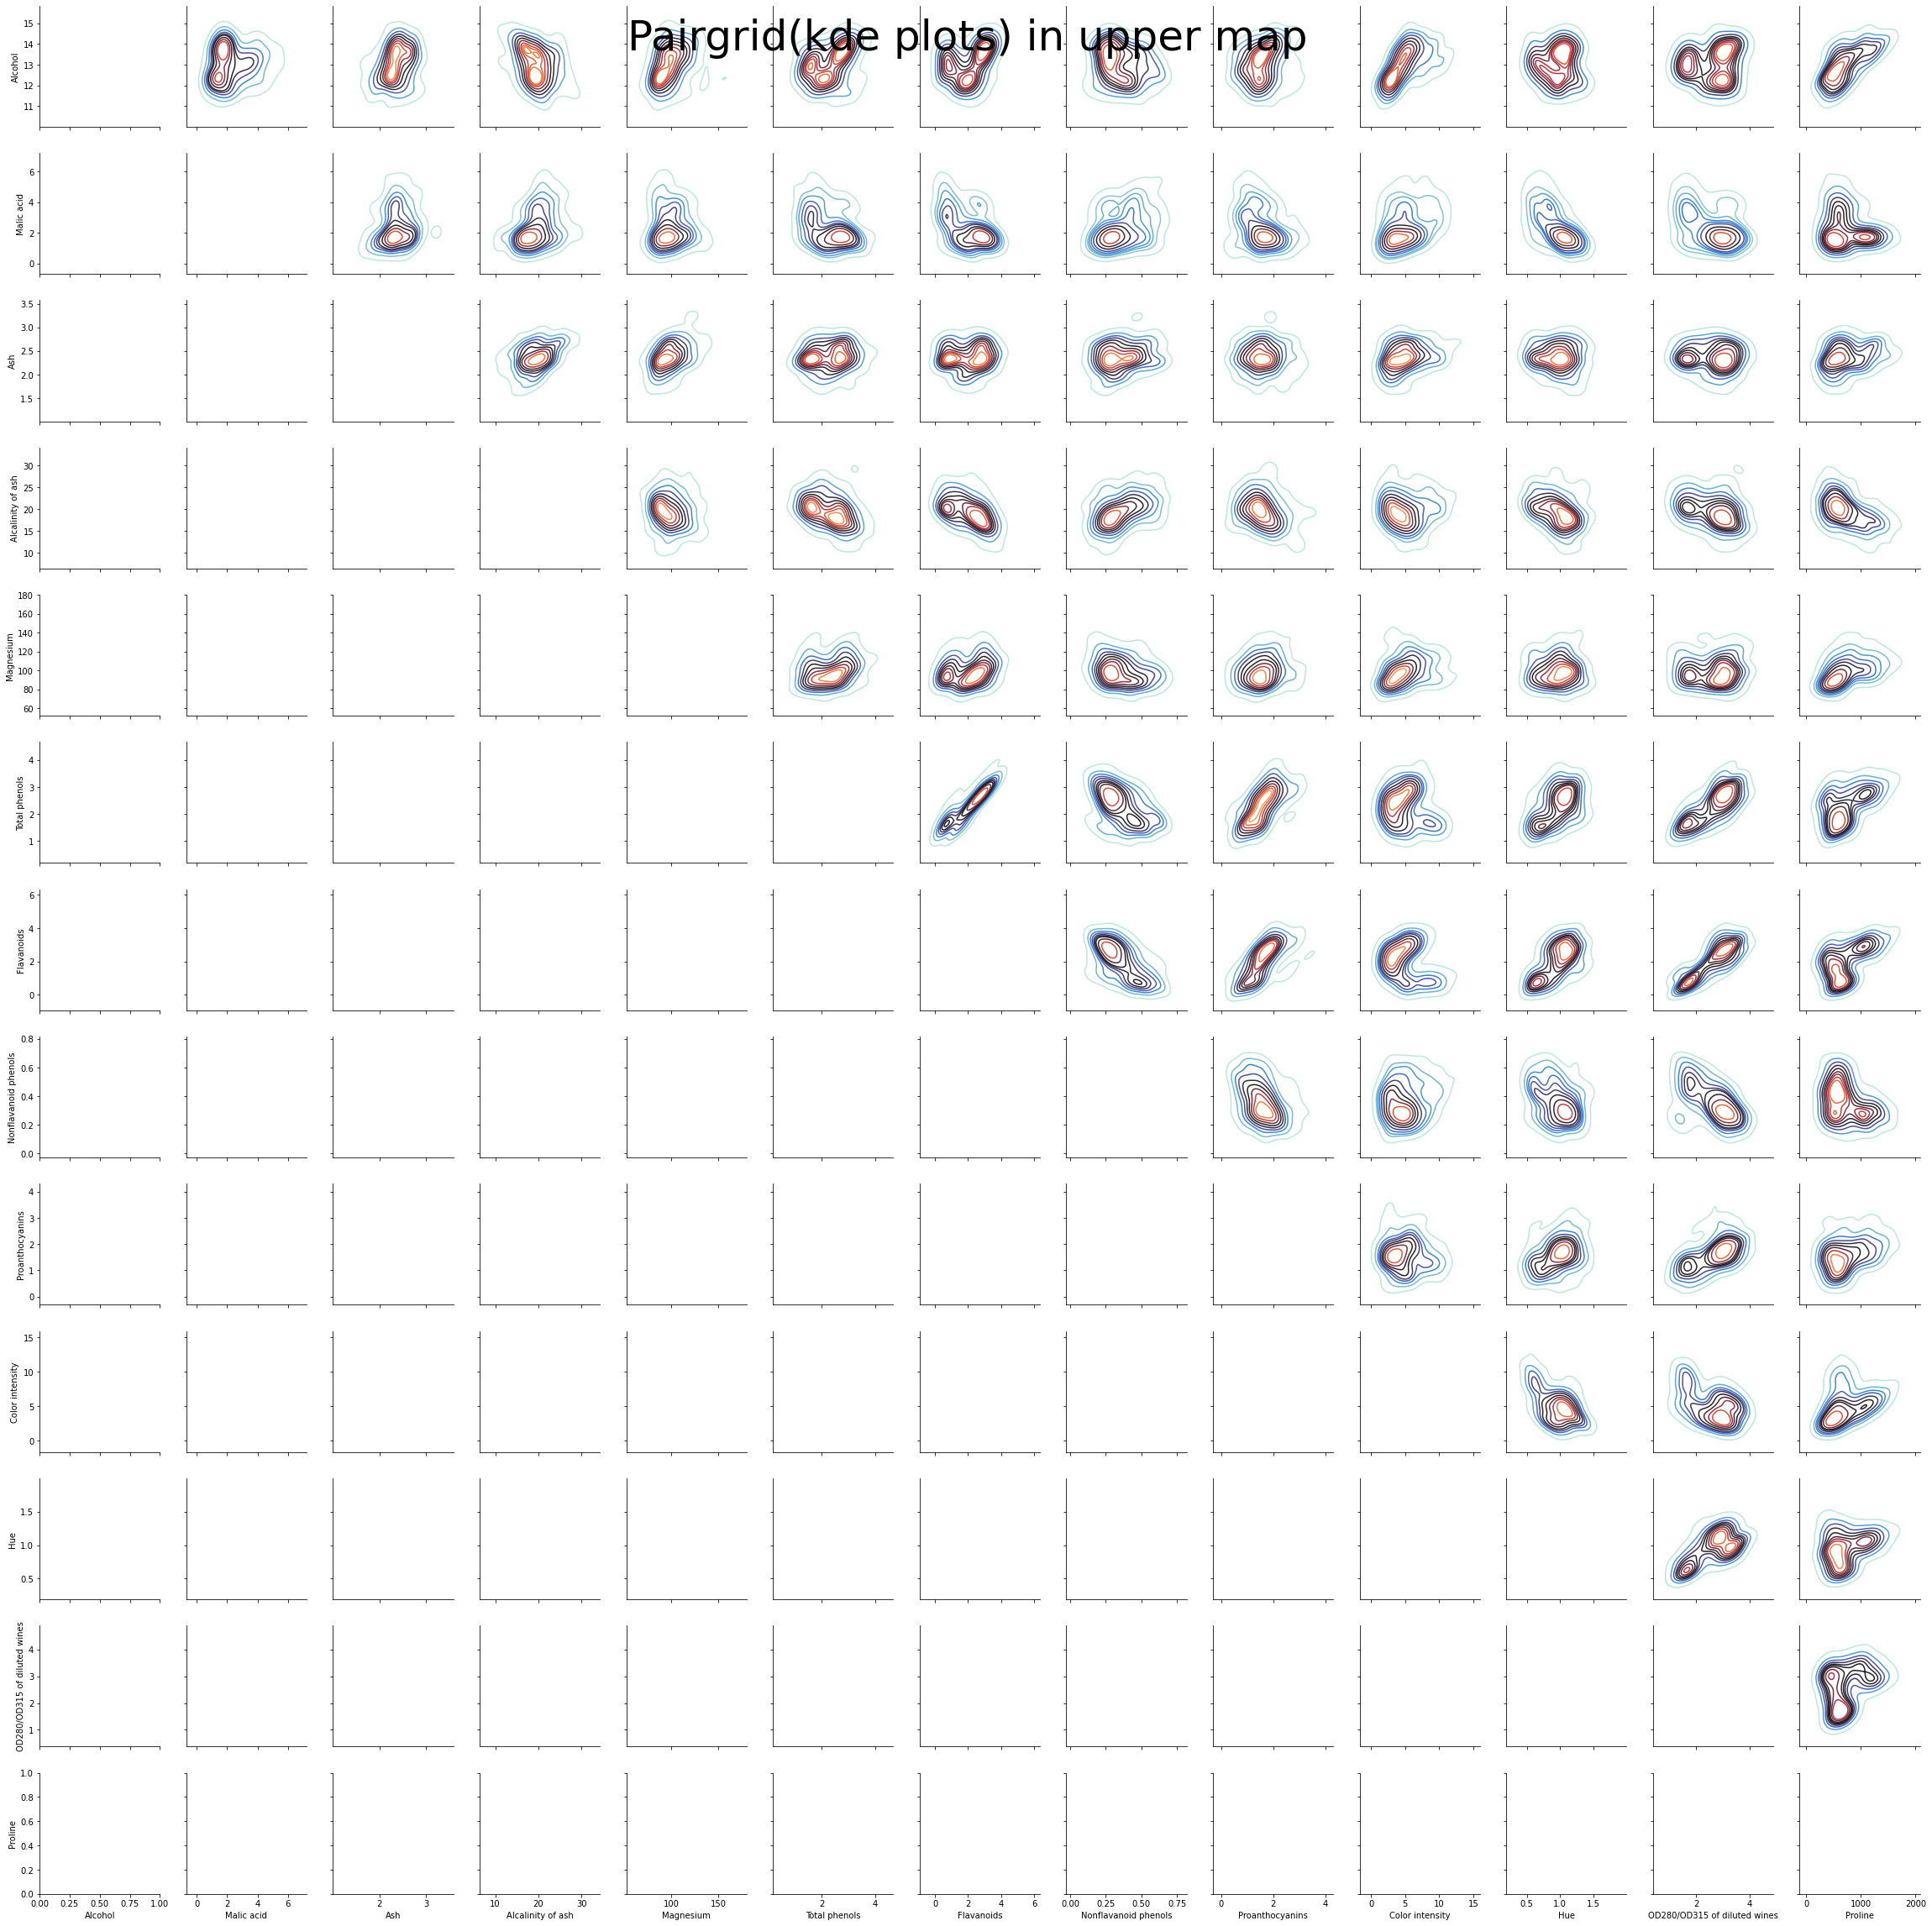

In [ ]:
grid=sns.PairGrid(data)
grid.map_upper(sns.kdeplot,cmap = 'icefire');
plt.suptitle('Pairgrid(kde plots) in upper map',size=50);

Observation:

From the above KDE plots most of the plots suggests the presence of two clusters in the dataset while few of them, e.g. Total Phenols,Flavanoids, Diluted wines. It also suggests, the presence of 3 clusters in the dataset.

From the correlation above , we observed that Total Phenols and Flavanoids have high positive correlation (0.86) which we can lead to multicollinearity in the data and thus give biased results.

So, we drop one of them from the data before proceeding further.

In [ ]:
# Dropping Total Phenols 
data1=data.drop(['Total phenols'],axis=1)

As we have many features in the dataset so in order to perform different clustering algorithms, we reduce our dataset from higher dimension to lower dimension using PCA, and PCA requires standardization of our variables first.

In [ ]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
data_std=StandardScaler().fit_transform(data1)
data2=pd.DataFrame(data_std,columns=data1.columns)

# **Dimensionality Reduction Using PCA:**

**Principal Component Analysis:**
Principal Component Analysis or PCA is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible.

In [ ]:
# Importing PCA
from sklearn.decomposition import PCA

In [ ]:
# Reduction to 2-Principal Components

pca_2=PCA(n_components=2).fit(data2)
pca_2_data=pca_2.transform(data2)

In [ ]:
## Plotting these two Principal Components

plt.figure(figsize=(7,7))
plt.xlabel("Principal Component 1",fontsize=10)
plt.ylabel("Principal Component 2",fontsize=10)
plt.title("PCA of dataset with two components",fontsize=10)
plt.scatter(pca_2_data[:,0],pca_2_data[:,1])
plt.show()

In [ ]:
#Varaince-ratio explained these two components
pca_2.explained_variance_ratio_

The First Principal Component(PCA1) and Second Principal Component(PCA2) explains around 54.26 % of the variance in data. So Now we take 3 Principal Components for measure.

In [ ]:
# Reducing to 3 Principal Components
pca_3=PCA(n_components=3)
pca_3_data=pca_3.fit_transform(data2)

In [ ]:
# Plotting these three Principal Components
plt.figure(figsize=(7,7))
plt.title("PCA of dataset with three components",fontsize=10)
plt.scatter(pca_3_data[:,0],pca_3_data[:,1])
plt.scatter(pca_3_data[:,1],pca_3_data[:,2])
plt.scatter(pca_3_data[:,2],pca_3_data[:,0])
plt.show()

In [ ]:
#Varaince-ratio explained these three components
pca_3.explained_variance_ratio_

Here PCA1 , PCA2 and PCA3 explains around 66.06% of the variance in data which is around 11.7% increase from PCA 1 and PCA 2 . Here We use  Cumulative sum to calculate the Variance.

In [ ]:
pca_3.components_

In [ ]:
#Bi-plot

plt.figure(figsize=(10,10))

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca_3_data[:,0:2],np.transpose(pca_3.components_[0:2, :]),list(data2.columns))
plt.show()

OBSERVATIONS:

1.Alkalinity of Ash,Nonflavanoid phenols and Malic acid tends to form one of the clusters.

2.Color Intensity,Ash,Alcohol,Magnesium and Proline tends to form another cluster.

3.Hue,Diluted wines,Flavanoids and Proanthocyanins tends to form yet another cluster.

In [ ]:
# New dataframe with 3 variables(Principal Components)
dataset=pca_3_data
new_data=pd.DataFrame(dataset)
new_data.columns=['PC1','PC2','PC3']
new_data.head()

# **Clustering:**

Clustering is an important concept when it comes to unsupervised learning. It mainly deals with finding a structure or pattern in a collection of uncategorized data. Unsupervised Learning Clustering algorithms will process your data and find natural clusters(groups) if they exist in the data.

# **1.K-Means Clustering:**

In [ ]:
from sklearn.cluster import KMeans
SSE=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    Kmeans.fit(new_data)
    SSE.append(Kmeans.inertia_)
plt.plot(range(1,11),SSE)
plt.xlabel("No. of Clusters")
plt.ylabel("Sum of Squared Errors")
plt.show()

Obsevation:

Using Elbow Method we can conclude that in wine data, we may have 2 or 3 clusters.

In [ ]:
kmeans_2=KMeans(n_clusters=2,init='k-means++',random_state=42).fit(new_data)
kmeans_3=KMeans(n_clusters=3,init='k-means++',random_state=42).fit(new_data)
y_kmeans_2=kmeans_2.fit_predict(new_data)
y_kmeans_3=kmeans_3.fit_predict(new_data)

Observation:

We have fitted the model using both 2 and 3 clusters,now we have to calculate the silhouette score for choose the correct cluster

In [ ]:
from sklearn.metrics import silhouette_score
## clusters 2 or 3 ? .Let's decide it using Silhouette index
print(f'Silhouette Score(n=2): {silhouette_score(new_data, y_kmeans_2)}')
print(f'Silhouette Score(n=3): {silhouette_score(new_data, y_kmeans_3)}')

Observation:

Since Silhouette score for 3 clusters is more than that of 2 clusters.Thus,we choose no. of clusters to be 3.

In [ ]:
# Labels
y_kmeans_3

In [ ]:
#Visualizing these clusters using scatter plot(We have taken PC1 and PC2 on x-axis and y-axis)

plt.scatter(dataset[y_kmeans_3==0,0],dataset[y_kmeans_3==0,1],s=80,c='red',label='cluster1')
plt.scatter(dataset[y_kmeans_3==1,0],dataset[y_kmeans_3==1,1],s=80,c='yellow',label='cluster2')
plt.scatter(dataset[y_kmeans_3==2,0],dataset[y_kmeans_3==2,1],s=80,c='green',label='cluster3')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

Observation:

The above plot represents the 3 clusters in the wine data using K-Means Clustering.

# **2. K-Medoids Clustering :**
K-medoids Clustering is an Unsupervised Clustering algorithm that cluster objects in unlabelled data... In K-medoids Clustering, instead of taking the centroid of the objects in a cluster as a reference point as in k-means clustering, we take the medoid as a reference point.

In [ ]:
! pip install scikit-learn-extra

In [ ]:
from sklearn_extra.cluster import KMedoids

models = [
     (
         KMedoids(metric="manhattan", n_clusters=3, 
         init="heuristic", max_iter=6)
     ),
     (
         KMedoids(metric="euclidean", n_clusters=3,  
         init="heuristic", max_iter=6)
     ),
     (  
         KMedoids(metric="cosine", n_clusters=3, 
         init="heuristic", max_iter=6)
     )
        ] 
kmed_1=models[0].fit(new_data)
kmed_2=models[1].fit(new_data)
kmed_3=models[2].fit(new_data)
#Predicting
y_kmed_1=kmed_1.predict(new_data)
y_kmed_2=kmed_2.predict(new_data)
y_kmed_3=kmed_3.predict(new_data)

In [ ]:
print(f'Silhouette Score("manhattan metric"): {silhouette_score(new_data, y_kmed_1)}')
print(f'Silhouette Score("euclidean metric"): {silhouette_score(new_data, y_kmed_2)}')
print(f'Silhouette Score("cosine"): {silhouette_score(new_data, y_kmed_3)}')

Observation:

Euclidean metric gives the maximum Silhouette score,which is almost same as that of KMeans Clustering.

In [ ]:
#Visualizing the clusters using scatter plot with Euclidean metric(Taken PC1 and PC2 on x-axis and y-axis)

plt.scatter(dataset[y_kmed_2==0,0],dataset[y_kmed_2==0,1],s=80,c='red',label='cluster1')
plt.scatter(dataset[y_kmed_2==1,0],dataset[y_kmed_2==1,1],s=80,c='yellow',label='cluster2')
plt.scatter(dataset[y_kmed_2==2,0],dataset[y_kmed_2==2,1],s=80,c='green',label='cluster3')
plt.title("K-Medoids Clustering")
plt.legend()
plt.show()

Observation:

The above plot represents that there have 3 cluters in the wine data using K-Medoids Clustering.

Here, the major difference is the assignment of cluster 2 and cluster 3 to data points.It has been reversed when compared to K-Means Clustering.

# **3. Gaussian Mixture clustering :**



Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster.Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

In [ ]:
# To decide the no of clusters, We use Silhouette score method:

from sklearn.mixture import GaussianMixture

# Model fitting with 2 components
gmm_2 = GaussianMixture(n_components=2)
gmm_2.fit(new_data)
y_gmm_2=gmm_2.predict(new_data)

#Model fitting with 3 components
gmm_3 = GaussianMixture(n_components=3)
gmm_3.fit(new_data)
y_gmm_3=gmm_3.predict(new_data)

In [ ]:
print(f'Silhouette Score("n_clusters=2"): {silhouette_score(new_data, y_gmm_2)}')
print(f'Silhouette Score("n_clusters=3"): {silhouette_score(new_data, y_gmm_3)}')

Observation:

If we take no of clusters to be 3, we get more value of Silhouette score.So, we will go with 3 cluters.

NOTE: This value is slightly less than that of KMeans.

In [ ]:
# Visualizing GMM with 3 clusters

plt.scatter(dataset[y_gmm_3==0,0],dataset[y_gmm_3==0,1],s=80,c='violet',label='cluster1')
plt.scatter(dataset[y_gmm_3==1,0],dataset[y_gmm_3==1,1],s=80,c='orange',label='cluster2')
plt.scatter(dataset[y_gmm_3==2,0],dataset[y_gmm_3==2,1],s=80,c='brown',label='cluster3')
plt.legend()
plt.show()

#**4.Spectral Clustering:**
In multivariate statistics, spectral clustering techniques make use of the spectrum of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions.

This clustering technique uses the result from Linear Algebra that any Symmetric matrix is orthogonally similar to Diagonal matrix . Thus we can write : M= D^(-1/2) * K * D^(-1/2) where K is a Adjacency Matrix(symmetric) and D is a Diagonal matrix.

K- matrix is formed by using decay rate(rbf parameter) and euclidean distance, k(xi,xj)=exp(-rbf*sq(|xi-xj|))

In [ ]:
from scipy.spatial import distance
rbf_param =1
# K is a Adjacency Matrix(Square Matrix)
K= np.exp(-rbf_param * distance.cdist(new_data,new_data,metric='sqeuclidean'))
K.shape

In [ ]:
#D is a diagonal matrix whose diagonal elements are the sum of respective rows of matrix K
D= K.sum(axis=1)
D= np.sqrt(1/D)
M= np.multiply(D[np.newaxis,:],np.multiply(K,D[:,np.newaxis]))
M.shape

In [ ]:
from scipy import linalg
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

In [ ]:
U,sigma,_ = linalg.svd(M,full_matrices=False,lapack_driver='gesvd')
# first-three eigen vectors are used to form clusters
U_subset=U[:,0:3]
y_sc_1=KMeans(n_clusters=3).fit_predict(normalize(U_subset))
y_sc_1

In [ ]:
plt.scatter(dataset[:,0],dataset[:,1],c=y_sc_1,s=100)
plt.show()

While forming the matrix M, we have considered the new_data- which has been obtained after performing PCA on Standardized data.So, lets try to fit another Spectral Clustering model without normalizing the U_subset.

In [ ]:
#If we don't normalize the U_subset
U,sigma,_ = linalg.svd(M,full_matrices=False,lapack_driver='gesvd')
# first-three eigen vectors are used to form clusters
U_subset=U[:,0:3]
y_sc_2=KMeans(n_clusters=3).fit_predict((U_subset))
y_sc_2

In [ ]:
plt.scatter(dataset[:,0],dataset[:,1],c=y_sc_2,s=100)
plt.show()

Observation:

The above scatter plot infers that the model has only 2 clusters.

In [ ]:
print(f'Silhouette Score("Normalized"): {silhouette_score(new_data, y_sc_1)}')
print(f'Silhouette Score("Non-Normalized"): {silhouette_score(new_data, y_sc_2)}')

# **5.Hierarchical Clustering:**
Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

In [ ]:
#Hierarchical Clustering uses Dendrogram to decide the no. of clusters
import scipy.cluster.hierarchy  as shc
plt.figure(figsize=(10,10))
plt.title('Dendogram')
dend=shc.dendrogram(shc.linkage(new_data,method='ward'))
# We have the longest vertical line in the range around 15-25,so we set the threshold to be 20
plt.axhline(y=20,color='red',linestyle='--') 

Observation:

From the Dendrogram above, we have the horizontal red dashed line cutting 3 vertical lines. So, we set the no. of clusters to be 3.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hr=cluster.fit_predict(new_data)
plt.scatter(dataset[:,0],dataset[:,1],s=100,c=cluster.labels_)

Now we have to choose some model,but...

WHICH MODEL TO CHOOSE ???

We performed 5 different clustering models on the same dataset to choose the best-fit model,we compare all of them

In [ ]:
print(f'Silhouette Score("K-Means"): {silhouette_score(new_data, y_kmeans_3)}')
print(f'Silhouette Score("K-Medoids"): {silhouette_score(new_data, y_kmed_2)}')
print(f'Silhouette Score("GMM"): {silhouette_score(new_data, y_gmm_3)}')
print(f'Silhouette Score("Hierarchical"): {silhouette_score(new_data, y_hr)}')
print(f'Silhouette Score("Spectral"): {silhouette_score(new_data, y_sc_1)}')

In [ ]:
## Visualizing all the scatter plots at one go

fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax1.scatter(dataset[:,0],dataset[:,1],c=y_kmeans_3,s=100)
ax1.set_title('K-Means Clustering')
ax2.scatter(dataset[:,0],dataset[:,1],c=y_kmed_2,s=100)
ax2.set_title('K-Medoids Clustering')
ax3.scatter(dataset[:,0],dataset[:,1],c=y_gmm_3,s=100)
ax3.set_title('Gaussian Mixture Model Clustering')
ax4.scatter(dataset[:,0],dataset[:,1],c=y_hr,s=100)
ax4.set_title('Hierarchical Clustering(Agglomerative)')
ax5.scatter(dataset[:,0],dataset[:,1],c=y_sc_1,s=100)
ax5.set_title('Spectral Clustering')

Observation:

All the scatter plots above are more or less same.So, we use Silhouette Score to finally decide the model of best fit.

### **There isn't much difference in the Silhouette scores too, but to choose the best one - K-MEANS Clustering is the best fitted model among all other models...**

In [ ]:
#here the dataframe(df) used is the one before standardization
data=pd.read_csv('/content/drive/MyDrive/Wine 0.csv')
data['Cluster']=y_kmeans_3
data

In [ ]:
sns.pairplot(data,hue='Cluster')

In [ ]:
#Boxplots with 3 clusters corresponding to each variable

rows=5
cols=3
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.boxplot(x='Cluster',y=data[col[index]],data=data,ax=ax[i][j],palette='bright')
        index+=1
        if index>12:
            break
plt.tight_layout()
plt.show()

In [ ]:
univarstats(data)[['Max','Min']]

In [ ]:
#Based on the boxplots above

table = {'Cluster1':['Low','Low','Moderate','Moderate','Low','Moderate','Moderate','Moderate','Moderate','Low','Moderate','Moderate','Low'],
         'Cluster2':['High','Low','Moderate','Low','Moderate','Moderate','Moderate','Low','Moderate','Moderate','Moderate','High','High'],
         'Cluster3':['Moderate','Moderate','Moderate','Moderate','Moderate','Low','Very low','High','Low','High','Low','Very Low','Low']}
table=pd.DataFrame(table,index=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'])
table

# Final Conclusion:
So, when different raw materials(variables) are mixed in different proportions they lead to 3 different categories of wine.

Finally, we can conclude that there are 3 types of wine.